In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_new = pd.read_csv("C:/Users\XD/Desktop/KarachiAI Course/CSV Files/WALMART_SALES_DATA.csv")

In [3]:
data_new.shape

(6435, 8)

In [4]:
data_new.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
data_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data_new.isna().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [7]:
data_new.duplicated().any()

False

In [8]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
data_new['date'] = pd.to_datetime(data_new['Date'])
day=[]
month=[]
year=[]
week=[]
for i in data_new['date']:
    #dt_object2 = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    day.append(i.day)
    month.append(i.month)
    year.append(i.year)
    week.append(i.week)
data_new['Week'] = pd.DataFrame(week)
data_new['Week'] = data_new['Week'].astype(float)
data_new['Month'] = pd.DataFrame(month)
data_new['Month'] = data_new['Month'].astype(float)
data_new['Year'] = pd.DataFrame(year)
data_new['Year'] = data_new['Year'].astype(float)

In [16]:
data_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Week,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,17.0,5.0,2010.0
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,48.0,12.0,2010.0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,7.0,2.0,2010.0
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,8.0,2.0,2010.0
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,18.0,5.0,2010.0


In [18]:
data_new = data_new.drop('Date',axis=1,inplace=False) 

In [19]:
data_new = data_new.drop('date',axis=1,inplace=False) 

In [23]:
data_new.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Holiday_Flag_0,Holiday_Flag_1
0,1,1643690.90,42.31,2.572,211.096358,8.106,17.0,5.0,2010.0,1,0
1,1,1641957.44,38.51,2.548,211.242170,8.106,48.0,12.0,2010.0,0,1
2,1,1611968.17,39.93,2.514,211.289143,8.106,7.0,2.0,2010.0,1,0
3,1,1409727.59,46.63,2.561,211.319643,8.106,8.0,2.0,2010.0,1,0
4,1,1554806.68,46.50,2.625,211.350143,8.106,18.0,5.0,2010.0,1,0


In [21]:
data_new = pd.get_dummies(data_new, columns=['Holiday_Flag'])

In [22]:
data_new

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Holiday_Flag_0,Holiday_Flag_1
0,1,1643690.90,42.31,2.572,211.096358,8.106,17.0,5.0,2010.0,1,0
1,1,1641957.44,38.51,2.548,211.242170,8.106,48.0,12.0,2010.0,0,1
2,1,1611968.17,39.93,2.514,211.289143,8.106,7.0,2.0,2010.0,1,0
3,1,1409727.59,46.63,2.561,211.319643,8.106,8.0,2.0,2010.0,1,0
4,1,1554806.68,46.50,2.625,211.350143,8.106,18.0,5.0,2010.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,64.88,3.997,192.013558,8.684,39.0,9.0,2012.0,1,0
6431,45,733455.07,64.89,3.985,192.170412,8.667,19.0,5.0,2012.0,1,0
6432,45,734464.36,54.47,4.000,192.327265,8.667,50.0,12.0,2012.0,1,0
6433,45,718125.53,56.47,3.969,192.330854,8.667,42.0,10.0,2012.0,1,0


### Applying Correlation 

In [24]:
data_new.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Holiday_Flag_0,Holiday_Flag_1
Store,1.000000e+00,-0.335332,-0.022659,0.060023,-0.209492,0.223531,1.038488e-15,6.289676e-16,3.474318e-12,-2.023981e-15,-4.386841e-16
Weekly_Sales,-3.353320e-01,1.000000,-0.063810,0.009464,-0.072634,-0.106176,6.610484e-02,6.753523e-02,-1.837754e-02,-3.689097e-02,3.689097e-02
Temperature,-2.265908e-02,-0.063810,1.000000,0.144982,0.176888,0.101158,7.318701e-02,6.643970e-02,6.426923e-02,1.550913e-01,-1.550913e-01
Fuel_Price,6.002295e-02,0.009464,0.144982,1.000000,-0.170642,-0.034684,-4.193804e-02,-5.283174e-02,7.794703e-01,7.834652e-02,-7.834652e-02
CPI,-2.094919e-01,-0.072634,0.176888,-0.170642,1.000000,-0.302020,2.782979e-03,1.478843e-03,7.479573e-02,2.162091e-03,-2.162091e-03
Unemployment,2.235313e-01,-0.106176,0.101158,-0.034684,-0.302020,1.000000,-6.038021e-03,-2.061552e-03,-2.418135e-01,-1.096028e-02,1.096028e-02
Week,1.038488e-15,0.066105,0.073187,-0.041938,0.002783,-0.006038,1.000000e+00,9.964777e-01,-1.269874e-01,-3.288032e-01,3.288032e-01
Month,6.289676e-16,0.067535,0.066440,-0.052832,0.001479,-0.002062,9.964777e-01,1.000000e+00,-1.390145e-01,-3.322341e-01,3.322341e-01
Year,3.474318e-12,-0.018378,0.064269,0.779470,0.074796,-0.241813,-1.269874e-01,-1.390145e-01,1.000000e+00,5.678257e-02,-5.678257e-02
Holiday_Flag_0,-2.023981e-15,-0.036891,0.155091,0.078347,0.002162,-0.010960,-3.288032e-01,-3.322341e-01,5.678257e-02,1.000000e+00,-1.000000e+00


<AxesSubplot:>

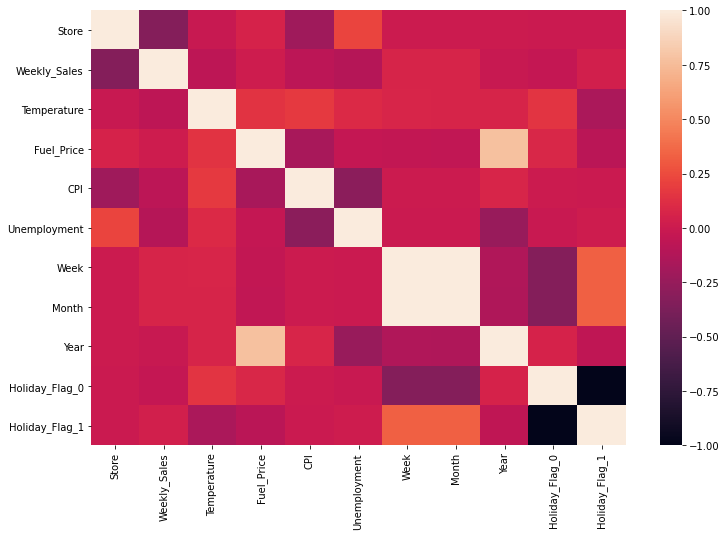

In [25]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(data_new.corr())

## Applying Model Traning & Testing

In [26]:
x = data_new
y = data_new['Weekly_Sales']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [28]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

msle=mean_squared_log_error(y_pred,y_test)
r2 = r2_score(y_pred, y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
print('Rsquared for the data:',r2)

RMLSE for the data: 1.0081711557726143e-15
Rsquared for the data: 1.0


In [29]:
x = data_new[['Store', 'CPI', 'Unemployment']]
y = data_new['Weekly_Sales']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [31]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
results = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

msle=mean_squared_log_error(y_pred,y_test)
r2 = r2_score(y_pred, y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
print('Rsquared for the data:',r2)

RMLSE for the data: 0.5858724675011664
Rsquared for the data: -4.9859869617148584


#### So the conclusion of this data set will be that the results are little bit accurrate but with a bit more data we can get a good result.